In [32]:
import random
import utils
import numpy as np

# LeducGame class definition

In [33]:
class LeducGame:
    deck = []
    actions = [0,1] #0 is fold and 1 is push
    player1card=0;
    player2card=0;
    boardcard=0;
    result=0;
    player2action=0;
    
    #inititate a game
    def __init__(self):
        self.deck = [0,0,1,1,2,2]
        
        #deal card to game from deck
        self.player1card=utils.choose_and_remove(self.deck)
        self.player2card=utils.choose_and_remove(self.deck)
        self.boardcard=utils.choose_and_remove(self.deck)
        self.result=self.get_result()
        
        self.player2action=1;

    #allow to print leduc game state
    def __str__(self):
        return "Player1 = {} \nPlayer2 = {} \nBoard = {} \nDeck = {}\nResult = {}".format(self.player1card,self.player2card,self.boardcard,self.deck, self.result)
    
    #reset to a new game state
    def reset(self):
        self.deck = [0,0,1,1,2,2]
        
        #deal card to game from deck
        self.player1card=utils.choose_and_remove(self.deck)
        self.player2card=utils.choose_and_remove(self.deck)
        self.boardcard=utils.choose_and_remove(self.deck)
        self.result=self.get_result()
        
        self.player2action=1;
        
    #result() : 
    # 0  -> draw
    # 1  -> player1 win
    #-1  -> player2 win
    def get_result(self):
        #Pairs
        if (self.player1card==self.boardcard):
            result=1
        elif (self.player1card==self.boardcard):
            result=-1
        #Highest card
        elif (self.player1card>self.player2card):
            result=1
        elif(self.player1card<self.player2card):
            result=-1
        #Draw
        else:
            result=0
        return result
            
    def get_player1state(self):
        if self.player2action is not None:
            return self.player1card
        else:
            return self.player1card+3
    
    def play(self,action):
        self.reset()
        r=0
        if(action==self.player2action and action==1):
            if(self.result==1):
                r=2
            elif(self.result==-1):
                r=-2
        elif(action<self.player2action):
            if(self.result==1):
                r=-1
            elif(self.result==-1):
                r=1
        return r
    
    def evaluate(self,n):
        reward=0
        for i in range(0,n):
            state=self.get_player1state()
            action=utils.get_max_list(self.actions)
            reward+=self.play(action)
        return float(reward/n)
            

# Testing LeducGame

In [34]:
game=LeducGame()
print(game)

Player1 = 2 
Player2 = 0 
Board = 0 
Deck = [1, 1, 2]
Result = 1


# Creating the QTable

<img src="qtable.png" />.

In [42]:
state_number=6
qtable=np.zeros((state_number,2))
print(qtable)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


# Learning alg

In [43]:
epochs_number=10000000
evaluate_every=500000
evaluation=[]
alpha=0.1

for i in range(0, epochs_number):
    game=LeducGame()
    state = game.get_player1state()

    action = random.sample(game.actions,1) # Explore action space

    reward=game.play(action[0])
    old_value = qtable[state, action]
    new_value = (1 - alpha) * old_value + alpha * reward
    qtable[state, action] = new_value
    if(i % evaluate_every == 0):
        eval_game=LeducGame()
        evaluation.append(eval_game.evaluate(10000))
        #print(game.evaluate(100))

# Plotting results

In [44]:
print(qtable)

[[-0.5129179   0.65084863]
 [-0.47916483  0.81589382]
 [ 0.01274346  0.67034992]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


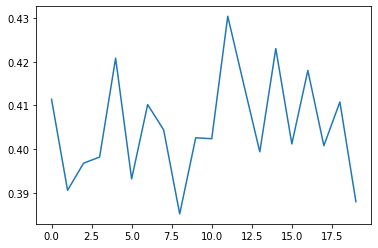

In [45]:
import matplotlib.pyplot as plt
plt.plot(evaluation)